# Задание 1. Методы понижения размерности

Примените методы понижения размерности PCA, t-SNE и UMAP к изображениям клеток крови из датасета BloodMNIST. Отобразите проекцию данных на двумерное пространство, так как это допускает наиболее простую визуализацию полученного результата (воспользуйтесь `sns.scatterplot` [🛠️[doc]](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)).  Какой метод позволяет лучше разделить данные в пространстве? Опишите ваши наблюдения.

## Формат результата

Пример графика для одного из пунктов задания:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.4/Exercises/EX04/result_1_task_ex04.png" width="300">

Установка и импорт необходимых библиотек:

In [ ]:
!pip install -q umap-learn
!pip install -q git+https://github.com/MedMNIST/MedMNIST.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.4 MB/s eta 0:00:00


In [ ]:
import umap
import medmnist
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from medmnist import INFO
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from warnings import simplefilter

simplefilter("ignore", category=FutureWarning)
matplotlib.style.use("ggplot")

Произведем загрузку данных:

In [ ]:
data_flag = "bloodmnist"
download = True

info = INFO[data_flag]
task = info["task"]
n_channels = info["n_channels"]
n_classes = len(info["label"])

DataClass = getattr(medmnist, info["python_class"])

# Load the data
bloodmnist = DataClass(split="train", download=download)
print(bloodmnist)

100%|██████████| 35.5M/35.5M [00:07<00:00, 4.97MB/s]


Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 11959
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: CC B

Доступ к данным идет посредством обращения к ключу `bloodmnist.imgs`, доступ к разметке классов — через `bloodmnist.labels`:

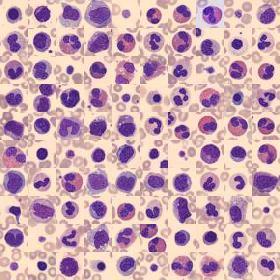

In [ ]:
x = bloodmnist.imgs / 255.0
x = x.reshape(-1, 2352)
y = pd.Series(bloodmnist.labels.reshape(-1))
y = y.astype("int").map(dict(zip(range(0, 8), info["label"].values())))


bloodmnist.montage(length=10)

## PCA

<Axes: xlabel='0', ylabel='1'>

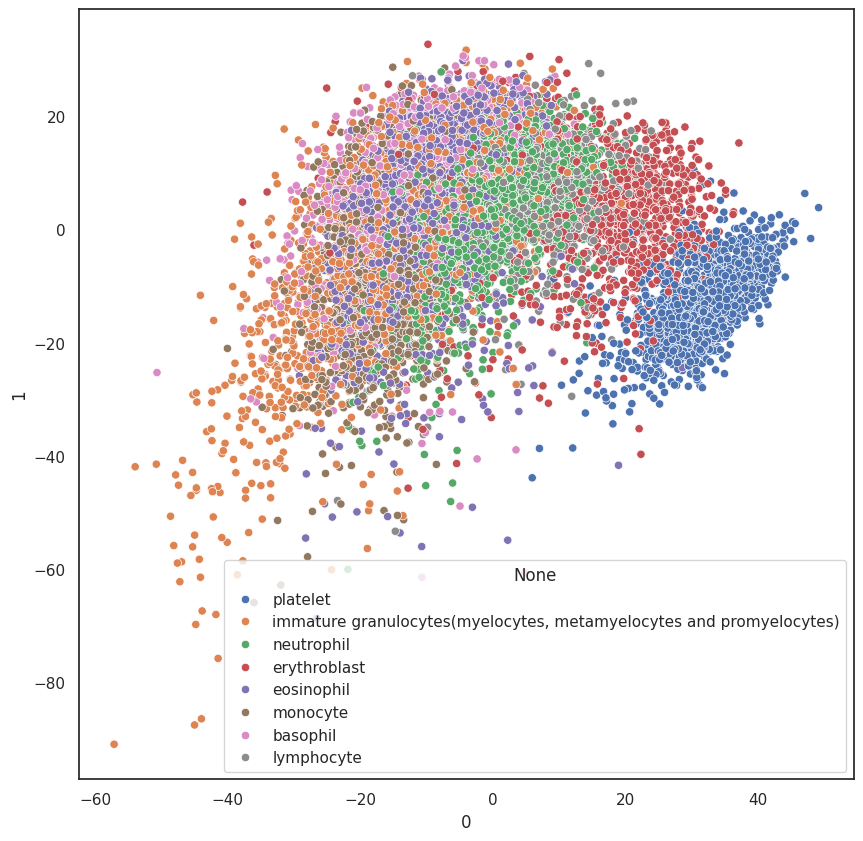

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
scl = StandardScaler()
x = scl.fit_transform(x)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
df = pd.DataFrame(x_pca)
sns.set(style='white', context='notebook', rc={'figure.figsize':(10,10)})
sns.scatterplot(df,x=0,y=1,hue = y)

## t-SNE

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 11959 samples in 0.056s...
[t-SNE] Computed neighbors for 11959 samples in 12.822s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11959
[t-SNE] Computed conditional probabilities for sample 2000 / 11959
[t-SNE] Computed conditional probabilities for sample 3000 / 11959
[t-SNE] Computed conditional probabilities for sample 4000 / 11959
[t-SNE] Computed conditional probabilities for sample 5000 / 11959
[t-SNE] Computed conditional probabilities for sample 6000 / 11959
[t-SNE] Computed conditional probabilities for sample 7000 / 11959
[t-SNE] Computed conditional probabilities for sample 8000 / 11959
[t-SNE] Computed conditional probabilities for sample 9000 / 11959
[t-SNE] Computed conditional probabilities for sample 10000 / 11959
[t-SNE] Computed conditional probabilities for sample 11000 / 11959
[t-SNE] Computed conditional probabilities for sample 11959 / 11959
[t-SNE] Mean sigma: 7.830888
[t-SNE] Computed co

<Axes: xlabel='0', ylabel='1'>

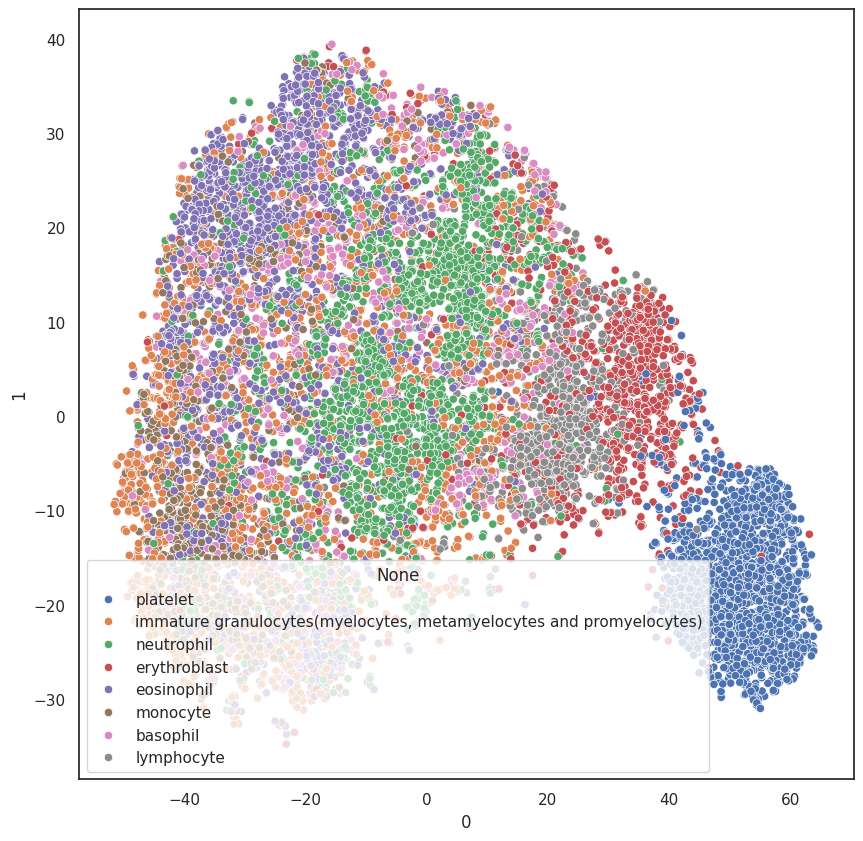

In [ ]:
import sklearn.manifold

np.random.seed(42)

x_reduced = PCA(n_components=9).fit_transform(x)
model = sklearn.manifold.TSNE(
    n_components=2,
    init=x_reduced[:, 0:2],
    perplexity=100,
    verbose=2,
    learning_rate="auto",
)

manifold = model.fit_transform(x_reduced)

df = pd.DataFrame(manifold)
sns.set(style='white', context='notebook', rc={'figure.figsize':(10,10)})
sns.scatterplot(df,x=0,y=1,hue = y)

## UMAP

<Axes: xlabel='0', ylabel='1'>

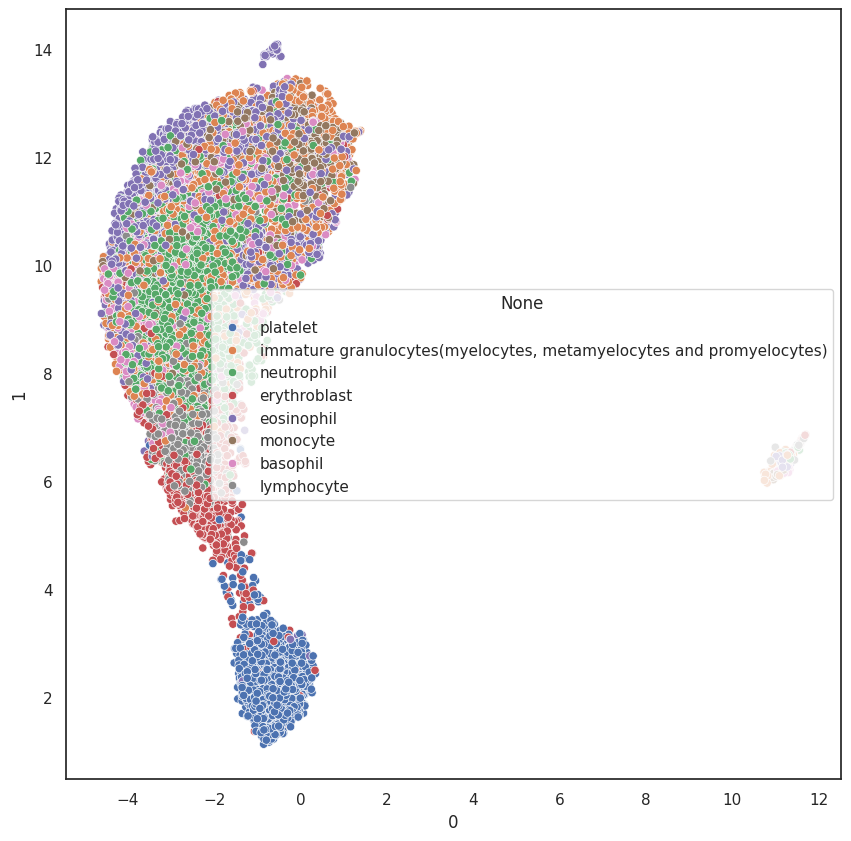

In [ ]:
np.random.seed(42)
manifold = umap.UMAP().fit_transform(x)
df = pd.DataFrame(manifold)
sns.set(style='white', context='notebook', rc={'figure.figsize':(10,10)})
sns.scatterplot(df,x=0,y=1,hue = y)

Выводы:
Все методы отделяют признаки класса platelet от других. При этом UMAP плотнее сгрупировал данных и образовал кластер для platelet. PCA и t-SNE образовали более разряженные группы в пространстве. По сравнению с PCA t-SNE для некоторых классов уменьшил перекрытие данных. В целом классы не очень хорошо разделяются в 2d. Лучше брать большие размерности.

# Задание 2. Использование понижения размерности для ускорения обучения

Рассмотрите набор данных TissueMNIST. В этом задании вам нужно сравнить производительность двух моделей: обученной с использованием всех доступных признаков и обученной на данных пониженной размерности. От вас требуется:

1. Построить модель `RandomForestClassifier()` и обучить ее на тренировочной выборке, оценить `accuracy` модели на тестовой выборке и время, потраченное на обучение.
2. Построить модель PCA на тренировочных данных и определить число главных компонент, объясняющих 90% дисперсии (или используйте любой другой способ выбора оптимального числа главных компонент, разбиравшийся на лекции).
3. Преобразовать данные тестовой выборки на главные компоненты полученной модели PCA.
4. Построить модель `RandomForestClassifier()` и обучить ее на данных пониженной размерности, оценить `accuracy` модели на тестовой выборке и время, потраченное на обучение.
5. Описать ваши наблюдения, сделать выводы.

## Формат результата

Получить значения точности (`accuracy`) и времени обучения `RandomForestClassifier()` на обычных данных и данных с пониженной размерностью.

Установка и импорт необходимых библиотек:

In [1]:
!pip install -q git+https://github.com/MedMNIST/MedMNIST.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.6 MB/s eta 0:00:00


In [2]:
import time
import medmnist
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from medmnist import INFO
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

matplotlib.style.use("ggplot")

Произведем загрузку данных:

In [3]:
data_flag = "tissuemnist"
download = True

info = INFO[data_flag]
task = info["task"]
n_channels = info["n_channels"]
n_classes = len(info["label"])

DataClass = getattr(medmnist, info["python_class"])

# Load the data
tissuemnist = DataClass(split="test", download=download)
print(tissuemnist)

100%|██████████| 125M/125M [00:12<00:00, 10.0MB/s]


Dataset TissueMNIST of size 28 (tissuemnist)
    Number of datapoints: 47280
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 1
    Meaning of labels: {'0': 'Collecting Duct, Connecting Tubule', '1': 'Distal Convoluted Tubule', '2': 'Glomerular endothelial cells', '3': 'Interstitial endothelial cells', '4': 'Leukocytes', '5': 'Podocytes', '6': 'Proximal Tubule Segments', '7': 'Thick Ascending Limb'}
    Number of samples: {'train': 165466, 'val': 23640, 'test': 47280}
    Description: We use the BBBC051, available from the Broad Bioimage Benchmark Collection. The dataset contains 236,386 human kidney cortex cells, segmented from 3 reference tissue specimens and organized into 8 categories. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. Each gray-scale image is 32×32×7 pixels, where 7 denotes 7 slices. We take maximum values across the slices and resize them into 28×28 gray-scale images.
    Licen

In [4]:
x = tissuemnist.imgs / 255.0
x = x.reshape(-1, 784)
y = tissuemnist.labels

tissuemnist.montage(length=5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify = y)

In [ ]:
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [6]:
%%time
rng = np.random.RandomState(42)
rf = RandomForestClassifier(n_estimators=200, random_state=rng)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Use all features, accuracy: {accuracy_rf:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Use all features, accuracy: 0.53
CPU times: user 3min 28s, sys: 470 ms, total: 3min 29s
Wall time: 3min 41s


58 components to 90% explained_variance_ratio


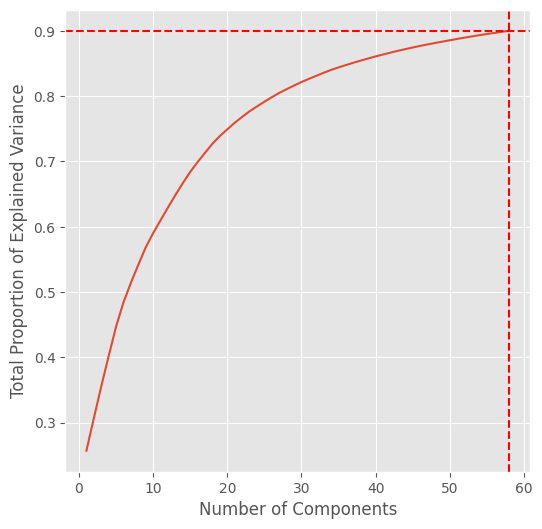

In [7]:
var_explained = 0.9
pca = PCA(var_explained)
pca.fit(x_train)

total_explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 6))

plt.plot(np.arange(1, len(total_explained) + 1), total_explained)
plt.axhline(y=var_explained, color="red", linestyle="--")
chosen_number = np.argmax(total_explained >= var_explained) + 1
plt.axvline(x=chosen_number, color="red", linestyle="--")
plt.ylabel("Total Proportion of Explained Variance")
plt.xlabel("Number of Components")
print(f"{chosen_number} components to 90% explained_variance_ratio")
plt.show()

In [8]:
pca = PCA(n_components=chosen_number)
x_pca_train = pca.fit_transform(x_train)
x_pca_test = pca.transform(x_test)

In [9]:
%%time
rf = RandomForestClassifier(n_estimators=200, random_state=rng)
rf.fit(x_pca_train,y_train)
y_pred_rf = rf.predict(x_pca_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Use {chosen_number} features, accuracy: {accuracy_rf:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Use 58 features, accuracy: 0.50
CPU times: user 2min 1s, sys: 953 ms, total: 2min 2s
Wall time: 2min 3s


_Вывод:_

До понижения размерности accuracy модели 0.53 (время работы 3 min 41 s).

После - 0.5 (время работы 2 min 3 s ).

Accuracy уменьшилась, но незначительно по сравнению со временем фитирования данных (после понижения размерности время обучения уменьшилась почти в два раза). Методы понижения размерности могут ускорять обучение моделей. Если качество не так важно, то можно работать и с преобразованными данными.

# Задание 3. Отбор признаков

У нас есть датасет из 30 признаков. Известно, что для улучшения качества предсказания достаточно использовать 5 признаков, но неизвестно, какие.

Отберите 5 признаков, используя методы отбора признаков, и увеличьте качество предсказания.

Используйте вначале быстрые методы (в частности: корелляцию, важность признаков согласно ML-моделям, метод `Boruta`), затем сравните результат с методом `SequentialFeatureSelector` из библиотеки `mlxtend`.

## Формат результата

* Accuracy модели > 0.62.


Установка и импорт необходимых библиотек:

In [1]:
!pip install -q catboost phik boruta

In [10]:
 !pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but 

In [2]:
import phik
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from boruta import BorutaPy
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold
from mlxtend.feature_selection import SequentialFeatureSelector

matplotlib.style.use("ggplot")

Произведем загрузку данных:

In [3]:
df = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/feature_select_ex.csv"
)
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,target
0,1.200866,1.809315,-1.493981,0.478672,-2.897162,0.374540,0.950714,0.731994,0.598658,0.156019,...,0.360723,-0.171863,135,0.118425,0.252259,5.147098,3,10,2,1
1,3.667649,-0.198241,-2.050940,2.648047,0.509638,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.284437,1.253283,1,1.716076,0.911066,3.195801,1,100,0,1
2,0.474824,-1.747566,0.011443,-2.446388,-1.228831,0.020584,0.969910,0.832443,0.212339,0.181825,...,0.587036,0.723224,-5,-0.169135,0.398492,2.761581,1,1,0,1
3,2.563288,-2.520330,-0.635430,-1.546171,0.041773,0.183405,0.304242,0.524756,0.431945,0.291229,...,0.517336,-0.065198,-8,0.230701,0.633872,4.323173,3,1,4,0
4,-0.610151,3.693206,1.680684,3.764060,1.686301,0.611853,0.139494,0.292145,0.366362,0.456070,...,-0.881526,-0.799493,79,0.208627,0.860287,0.308878,3,1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.099366,0.619790,-1.990348,-2.711178,-1.532242,0.446726,0.123450,0.205980,0.000943,0.039265,...,0.788255,0.861014,-12,-1.128063,0.154811,4.313848,3,1,2,0
996,0.556409,-0.932216,-1.099109,0.682384,-1.494444,0.977284,0.242354,0.663311,0.839100,0.550660,...,-0.406579,-0.229425,135,0.596009,0.302369,2.653560,1,100,4,1
997,-0.023030,-1.651666,0.513502,-3.119296,-1.236321,0.153145,0.728116,0.600251,0.731251,0.769747,...,-0.947043,1.770957,57,0.898512,0.724384,4.468656,1,10,0,0
998,-0.867747,0.900991,-3.809889,-1.612117,0.789160,0.975410,0.573563,0.341641,0.648465,0.068441,...,-0.985855,-1.061772,103,-0.425756,0.164947,7.237768,1,1,0,0


In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=["target"]), df["target"], test_size=0.2, random_state=42
)

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Use all features, accuracy: {accuracy_rf:.2f}")

Use all features, accuracy: 0.53


In [5]:
def test_feature_selection(features):
  x_train_feature = x_train[features]
  x_test_feature = x_test[features]
  rf = RandomForestClassifier(random_state=42)
  rf.fit(x_train_feature, y_train)
  y_pred_rf = rf.predict(x_test_feature)
  accuracy_rf = accuracy_score(y_test, y_pred_rf)
  print(f"Use 5 features, accuracy: {accuracy_rf:.2f}")

Отбор по phik корреляции:

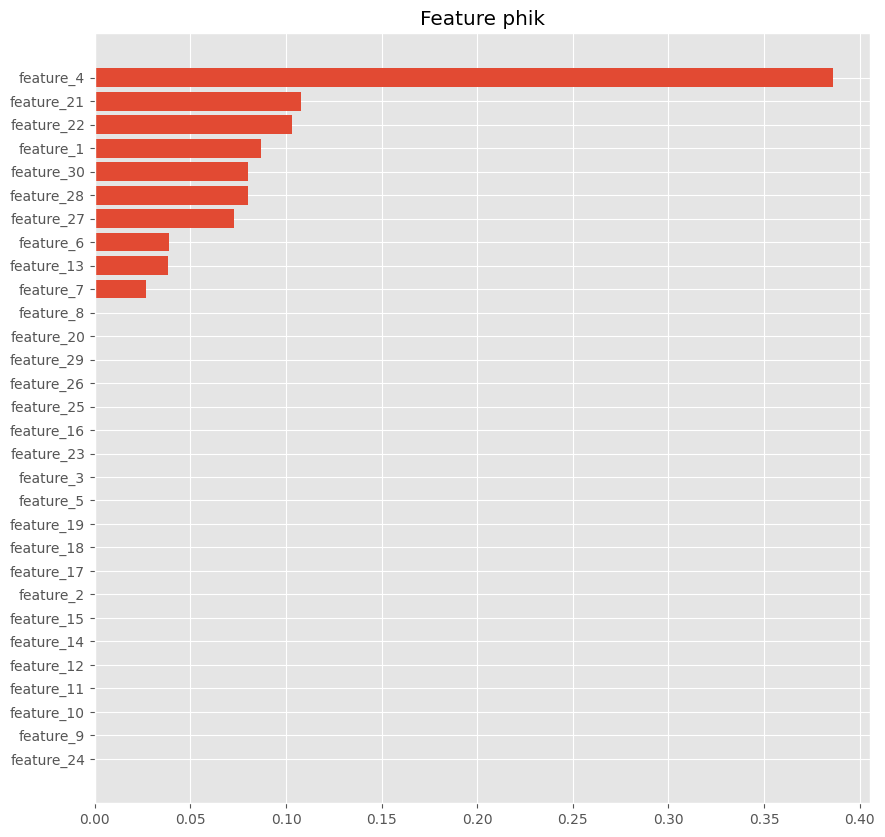

In [6]:
df_phik = (
    df.phik_matrix(interval_cols=df.columns)
    .round(3)
    .sort_values("target", ascending=False)
    .reset_index()[["index", "target"]][1:]
    .rename(columns={"index": "phik_feature", "target": "phik"})
    .reset_index(drop=True)
)

sorted_idx = np.argsort(df_phik["phik"])
fig = plt.figure(figsize=(10, 10))
plt.barh(range(df_phik.shape[0]), df_phik["phik"].iloc[sorted_idx], align="center")
plt.yticks(range(df_phik.shape[0]), df_phik["phik_feature"].iloc[sorted_idx])
plt.title("Feature phik")
plt.show()

In [7]:
top_5_features = df_phik.head(5)
print(x_train[top_5_features['phik_feature']])
test_feature_selection(top_5_features['phik_feature'])

     feature_4  feature_21  feature_22  feature_1  feature_30
29   -0.838439    0.821801   -0.299576   3.790297           2
535   3.278089    0.386107   -0.718514   0.170609           0
695  -1.087913   -1.121749    0.024408   0.392545           9
557  -3.119850   -0.921516   -0.233276   2.924509           0
836   0.962987   -0.149502    0.899361  -0.386682           0
..         ...         ...         ...        ...         ...
106   4.037207    0.552335    0.550657  -0.282686           4
270   0.112711    0.965932   -0.332324   0.082992           4
860   4.468558   -0.108612   -1.203929  -0.832310           9
435  -2.351966    1.137812    0.268911  -4.339355           4
102   3.319134    0.573987   -0.540440  -0.827735           4

[800 rows x 5 columns]
Use 5 features, accuracy: 0.54


Отбор с помощью линейной модели:

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
from sklearn.feature_selection import SelectFromModel

lr_selector = SelectFromModel(LogisticRegression(max_iter=1000))
lr_selector.fit(x_train_scaled, y_train)
test_feature_selection(x_train.columns[lr_selector.get_support()])

Use 5 features, accuracy: 0.47


Отбор с помощью случайного леса:

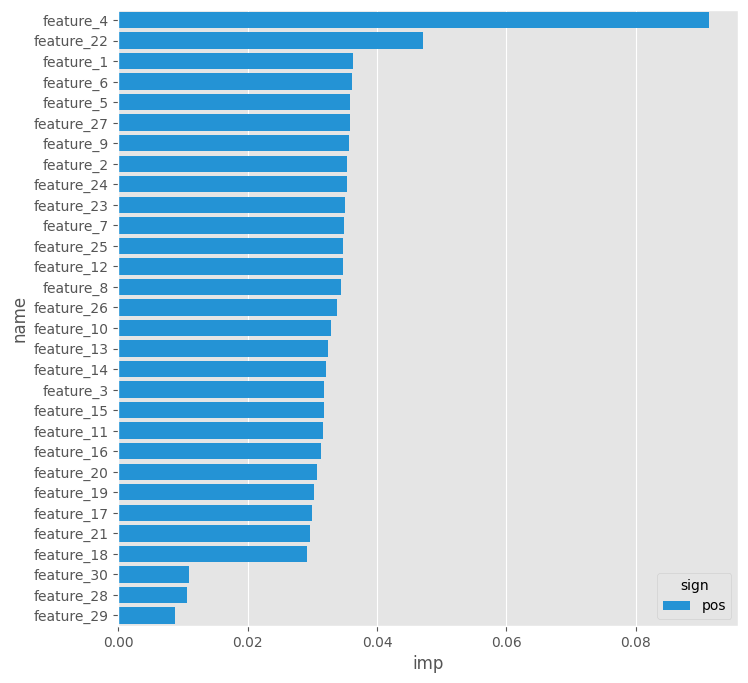

3      feature_4
21    feature_22
0      feature_1
5      feature_6
4      feature_5
Name: name, dtype: object
Use 5 features, accuracy: 0.57


In [10]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(x_train, y_train)

df_temp = pd.DataFrame(
    {"name": x_train.columns, "imp": rf.feature_importances_}
).sort_values("imp", key=abs, ascending=False)

df_temp["sign"] = ["neg" if x < 0 else "pos" for x in df_temp["imp"]]

palette = {"neg": sns.xkcd_rgb["orange"], "pos": sns.xkcd_rgb["azure"]}

plt.figure(figsize=(8, 8))
sns.barplot(data=df_temp, y="name", x="imp", hue="sign", palette=palette, orient="h")
plt.show()

top_5_rf = df_temp.head(5)
print(top_5_rf['name'])
test_feature_selection(top_5_rf['name'])

Отбор с помощью градиентного бустинга:

Learning rate set to 0.02999
0:	learn: 0.6884650	test: 0.6900375	best: 0.6900375 (0)	total: 62.1ms	remaining: 1m 2s
100:	learn: 0.4857140	test: 0.6586553	best: 0.6561080 (40)	total: 788ms	remaining: 7.01s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6561080125
bestIteration = 40

Shrink model to first 41 iterations.


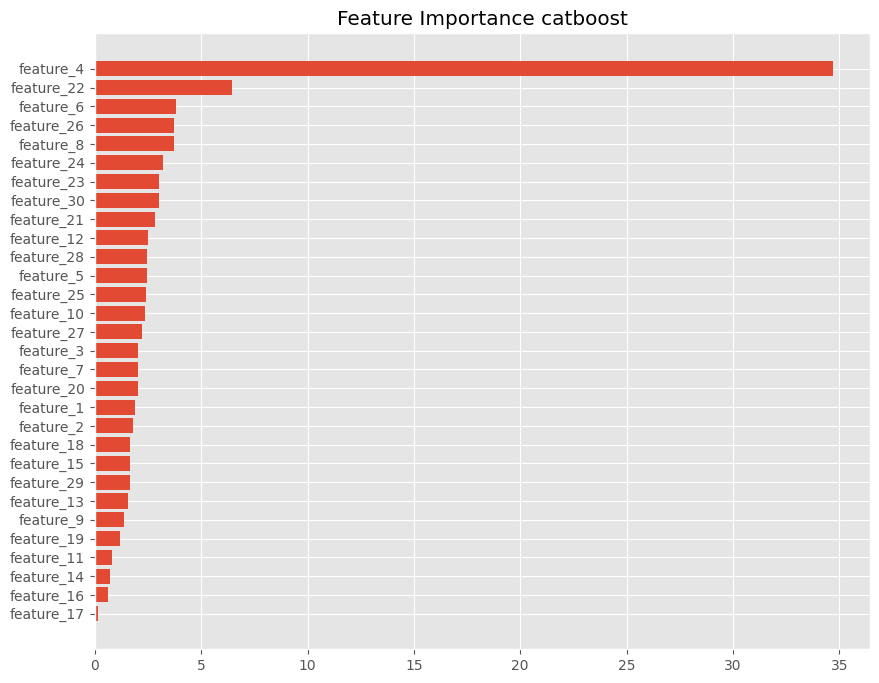

Index(['feature_8', 'feature_26', 'feature_6', 'feature_22', 'feature_4'], dtype='object')
Use 5 features, accuracy: 0.59


In [11]:
from catboost import CatBoostClassifier


model = CatBoostClassifier(random_state=42, thread_count=-1)
model.fit(
    x_train,
    y_train,
    eval_set=(x_test, y_test),
    verbose=100,
    plot=False,
    early_stopping_rounds=100,
)
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(x_train.columns)[sorted_idx])
plt.title("Feature Importance catboost")
plt.show()

top_5_catboost = x_train.columns[sorted_idx[-5:]]
print(top_5_catboost)
test_feature_selection(top_5_catboost)

Отбор с помощью Boruta:

In [12]:
model = RandomForestClassifier(n_estimators=500, random_state=42)

feat_selector = BorutaPy(model, n_estimators=100, verbose=1, random_state=42)

feat_selector.fit(x_train.values, y_train.values)
feature_rankings = pd.DataFrame({
    'Feature': x_train.columns,
    'Ranking': feat_selector.ranking_
})
top_features = feature_rankings.sort_values(by='Ranking').head(5)

print(top_features['Feature'])
test_feature_selection(top_features['Feature'])


Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100
Iteration: 17 / 100
Iteration: 18 / 100
Iteration: 19 / 100
Iteration: 20 / 100
Iteration: 21 / 100
Iteration: 22 / 100
Iteration: 23 / 100
Iteration: 24 / 100
Iteration: 25 / 100
Iteration: 26 / 100
Iteration: 27 / 100
Iteration: 28 / 100
Iteration: 29 / 100
Iteration: 30 / 100
Iteration: 31 / 100
Iteration: 32 / 100
Iteration: 33 / 100
Iteration: 34 / 100
Iteration: 35 / 100
Iteration: 36 / 100
Iteration: 37 / 100


BorutaPy finished running.

Iteration: 	38 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	28
3      feature_4
21    feature_22
0      feature_1
22    feature_23
4      feature_5
Name: Feature, dtype: object
Use 5 features, accuracy: 0.59


Жадный отбор признаков:

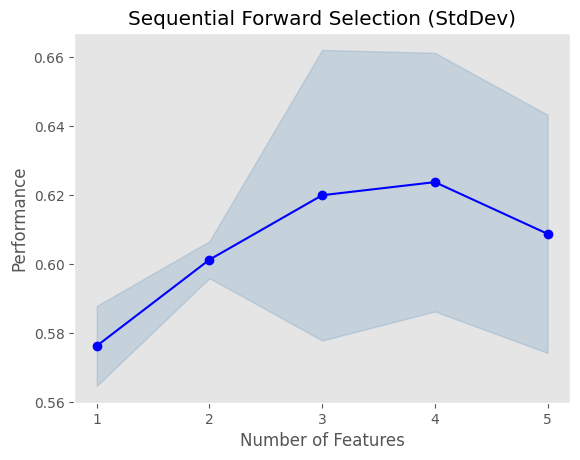

Use 5 features, accuracy: 0.65


In [13]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sffs = SequentialFeatureSelector(
    RandomForestClassifier(random_state=42),
    k_features=5,
    forward = True,
    floating=False,
    scoring="accuracy",
    cv=KFold(n_splits=3, shuffle=True, random_state=42),
)

sffs.fit(x_train.values, y_train)  # performs the actual SFFS algorithm
df_temp = pd.DataFrame.from_dict(sffs.get_metric_dict()).T
df_temp.head(df_temp.shape[0])


plot_sfs(sffs.get_metric_dict(), kind="std_dev")

plt.title("Sequential Forward Selection (StdDev)")
plt.grid()
plt.show()

test_feature_selection(x_train.iloc[:, list(df_temp["feature_idx"].values[-1])].columns)

In [16]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train[x_train.iloc[:, list(df_temp["feature_idx"].values[-1])].columns], y_train)
y_pred_rf = rf.predict(x_test[x_train.iloc[:, list(df_temp["feature_idx"].values[-1])].columns])
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'final test accuracy with SFS - {accuracy_rf:.2f}')

final test accuracy with SFS - 0.65


Максимальный результат (0.65) дал жадный отбор признаков. Из методов, основаных на важносте признаков, лучшие результаты показали CatBoost и Boruta (со случайным лесом) - 0.59.

# Задание 4. Бинарная классификация с LogisticRegression

В этом задании вам нужно решить задачу бинарной классификации. Используя только `LogisticRegression` [🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), добейтесь качества `accuracy` выше 0.91.

Что можно:
* Генерировать и отбирать признаки

Что нельзя:
* Менять модель

## Формат результата

* Accuracy модели > 0.91.


Импорт необходимых библиотек:

In [3]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

matplotlib.style.use("ggplot")

Произведем загрузку данных:

In [4]:
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/feature_engineering_data.csv

In [5]:
df = pd.read_csv("/content/feature_engineering_data.csv")
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,target
0,0.774059,140.294418,0.377009,4,0.233130,category_2,1
1,0.142857,168.224364,0.000856,23,0.427976,category_2,1
2,0.687500,165.427328,-1.353440,16,-0.996328,category_2,0
3,1.000000,188.878096,13.558928,4,0.332452,category_2,0
4,0.000000,183.025326,5.329313,4,-0.429498,category_1,1
...,...,...,...,...,...,...,...
1679,0.333333,212.082024,1.038087,29,0.427975,category_3,1
1680,0.000000,204.187500,-0.112248,19,-0.084355,category_1,1
1681,1.000000,159.500022,9.209267,19,0.045443,category_2,1
1682,0.454546,169.714358,2.718016,25,-0.507499,category_1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1684 non-null   float64
 1   feature_2  1684 non-null   float64
 2   feature_3  1684 non-null   float64
 3   feature_4  1684 non-null   int64  
 4   feature_5  1684 non-null   float64
 5   feature_6  1684 non-null   object 
 6   target     1684 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 92.2+ KB


В датасете есть категориальный признак - закодируем егос помощью One-hot encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
column_to_encode = 'feature_6'
encoded_array = encoder.fit_transform(df[[column_to_encode]])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))
df_encoded = pd.concat([df.drop(columns=[column_to_encode]), encoded_df], axis=1)

Посмотрим на корреляционную матрицы датасета:

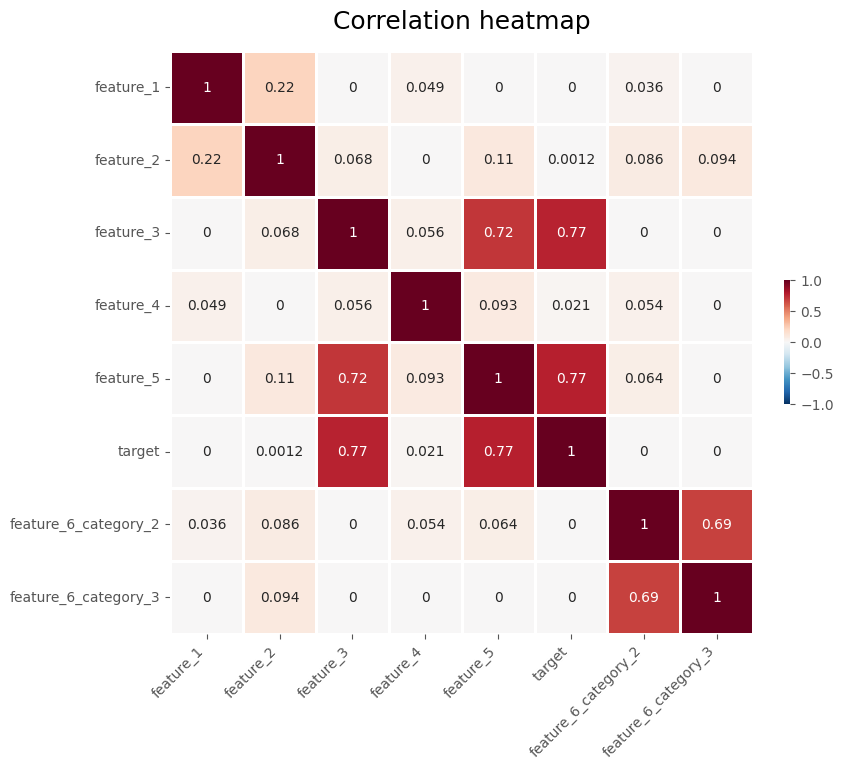

In [8]:
import seaborn as sns

plt.figure(figsize=(8, 8))

heatmap = sns.heatmap(
    df_encoded.phik_matrix(interval_cols=df.columns),
    annot=True,
    square=True,
    cmap="RdBu_r",
    vmax=1,
    vmin=-1,
    cbar_kws={"fraction": 0.01},  # shrink colour bar
    linewidth=2,
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
)
heatmap.set_title("Correlation heatmap", fontdict={"fontsize": 18}, pad=16)
plt.show()

Видно, что target коррелирует с фичами 3 и 5, которые также коррелируют между собой. Посмотрим на зависимость двух фич друг от друга и как от этого зависит таргет

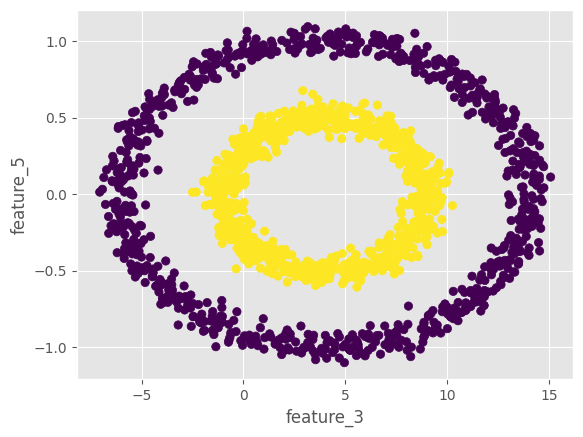

In [10]:
plt.scatter(df_encoded['feature_3'],df_encoded['feature_5'],c = df_encoded['target'])
plt.xlabel('feature_3')
plt.ylabel('feature_5')
plt.show()

Видно, что классы хорошо раздалеются по радиусу $r = \sqrt((f3-mean(f3))^2 + (f5-mean(f5))^2)$. Поэтому можно ввести этот радиус, как новый признак.

Ниже разделяем на тренировочную и тестовую выборки

In [23]:
x = df_encoded.drop(columns=["target"])
y = df_encoded["target"]


# We make a 80/20% train/test split of the data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,stratify=y
)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

x_train = pd.DataFrame(data = x_train,columns = x.columns)
x_test =  pd.DataFrame(data = x_test,columns = x.columns)

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions
print("Accuracy of the model = %.2f" % model.score(x_test, y_test))

Accuracy of the model = 0.47


In [24]:
def test_model(feartures):
  model = LogisticRegression(max_iter=1000)
  model.fit(x_train[feartures], y_train)
  print('Accuracy on train=%.2f' % model.score(x_train[feartures], y_train))
  print("Accuracy of test = %.2f" % model.score(x_test[feartures], y_test))

In [25]:
f3_train_mean = np.mean(x_train['feature_3'])
f5_train_mean = np.mean(x_train['feature_5'])
x_train['new_feature_rad'] = np.sqrt((x_train['feature_3']-f3_train_mean)**2+(x_train['feature_5']-f5_train_mean)**2)
x_test['new_feature_rad'] = np.sqrt((x_test['feature_3']-f3_train_mean)**2+(x_test['feature_5']-f5_train_mean)**2)

In [26]:
test_model(['new_feature_rad'])

Accuracy on train=1.00
Accuracy of test = 1.00


Оказалось, что в предложенном задании класс зависел только от двух переменных. Причем, отобразив их на графике с метками классов, становится понятно, какой новый признак стоит добавить. После добавления (и стандартизации данных) с использованием только одного признака качество модели стало близко к единице.  